# Conhecendo a base de dados

## Importando os dados


In [1]:
import pandas as pd

In [2]:
path = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"
df_bairro = pd.read_csv(path, sep=";")
df_bairro.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [3]:
type(df_bairro)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [4]:
#Mostra as características do dado, linhas x colunas
df_bairro.shape

(32960, 9)

In [5]:
#Mostra quais são as colunas do dataframe
df_bairro.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [6]:
#Mostra as colunas juntamente com os tipos dos dados
df_bairro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [7]:
df_bairro.describe() #Mostra uma agregação das colunas

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [8]:
df_bairro['Tipo'] #O retorno dessa seleção de colunas é um series

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [9]:
df_bairro['Quartos']

0        1
1        2
2        0
3        1
4        1
        ..
32955    0
32956    3
32957    2
32958    2
32959    0
Name: Quartos, Length: 32960, dtype: int64

In [10]:
df_bairro[['Quartos', 'Valor']] #Seleção demais de uma coluna

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [11]:
df_bairro.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [12]:
round(df_bairro['Valor'].mean(), 2)

np.float64(12952.66)

In [13]:
#Valor médio por tipo
df_bairro.groupby('Tipo').mean(numeric_only = True) #Esse argumento indica para fazer a média unicamente com as colunas numéricas

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [14]:
#Valor médio por tipo, contendo somente a coluna valor
df_bairro.groupby('Tipo')[['Valor']].mean(numeric_only = True).sort_values('Valor', ascending= False)

,Valor
Tipo,
Prédio Inteiro,498637.239203
Indústria,120000.000000
Galpão/Depósito/Armazém,53407.062600
Terreno Padrão,32567.714286
Hotel,25000.000000
Loteamento/Condomínio,22000.000000
Conjunto Comercial/Sala,14715.045521
Casa Comercial,14478.264151
Loja/Salão,13769.646770


<Axes: ylabel='Tipo'>

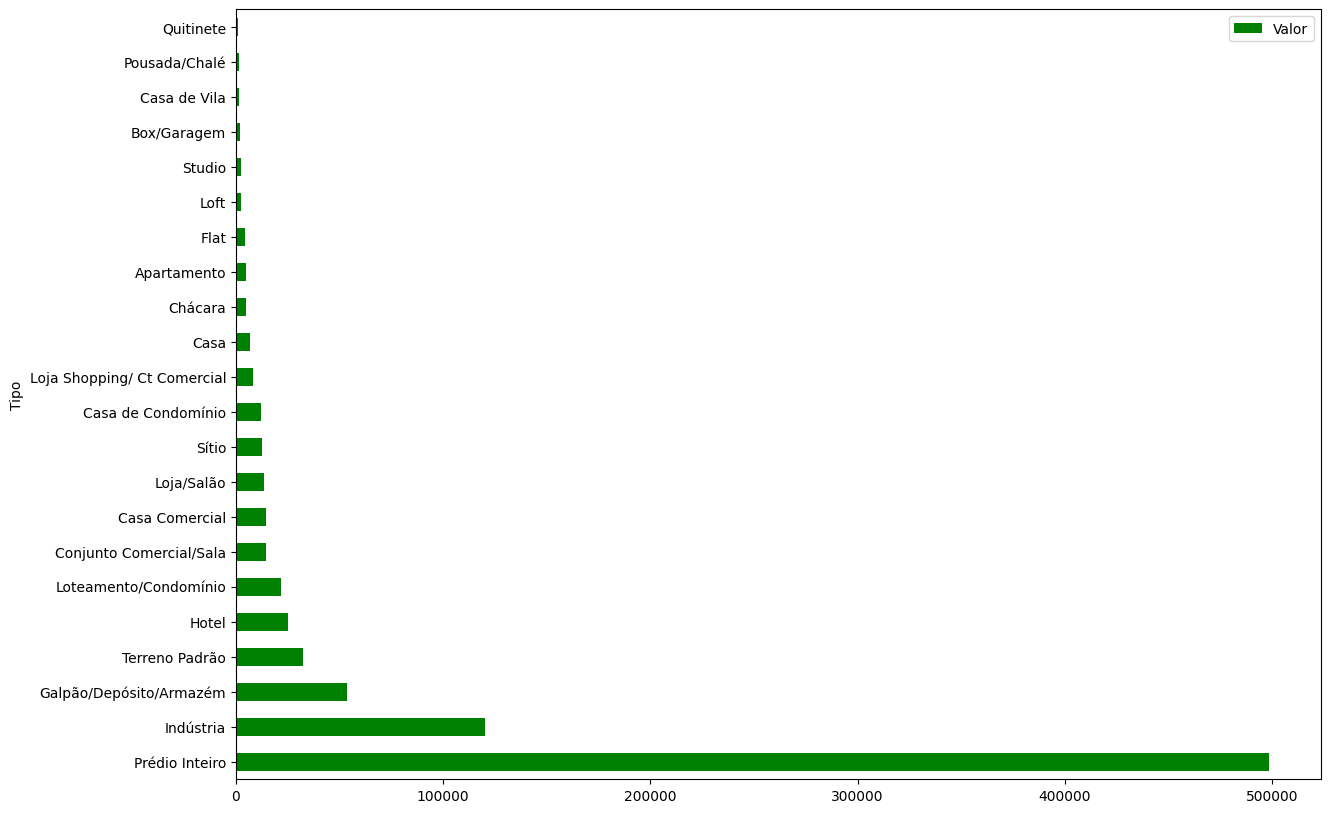

In [15]:
#Plotando a visualização dos dados
df_bairro_tipo = df_bairro.groupby('Tipo')[['Valor']].mean(numeric_only = True).sort_values('Valor', ascending= False)

df_bairro_tipo.plot(
    kind='barh',
    figsize=(14,10),
    color= 'green'
)

## Removendo os imóveis comerciais

In [16]:
#Seleção da coluna passando diretamente o nome, sem os colchetes
df_bairro.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [17]:
df_bairro[['Tipo']].drop_duplicates()

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [18]:
imoveis_comerciais = [
    'Conjunto Comercial/Sala',
    'Prédio Inteiro',
    'Loja/Salão',
    'Galpão/Depósito/Armazém',
    'Terreno Padrão',
    'Loja Shopping/ Ct Comercial',
    'Box/Garagem',
    'Chácara',
    'Loteamento/Condomínio',
    'Sítio',
    'Pousada/Chalé',
    'Hotel',
    'Indústria',
]

In [19]:
#Seleção de dados com base em uma expressão, o @ dentro da expressão é usado para chamar uma variável
df_bairro.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [20]:
df_bairro_comer = df_bairro.query('@imoveis_comerciais not in Tipo')
df_bairro_comer

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [21]:
df_bairro_comer['Tipo'].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa Comercial', 'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

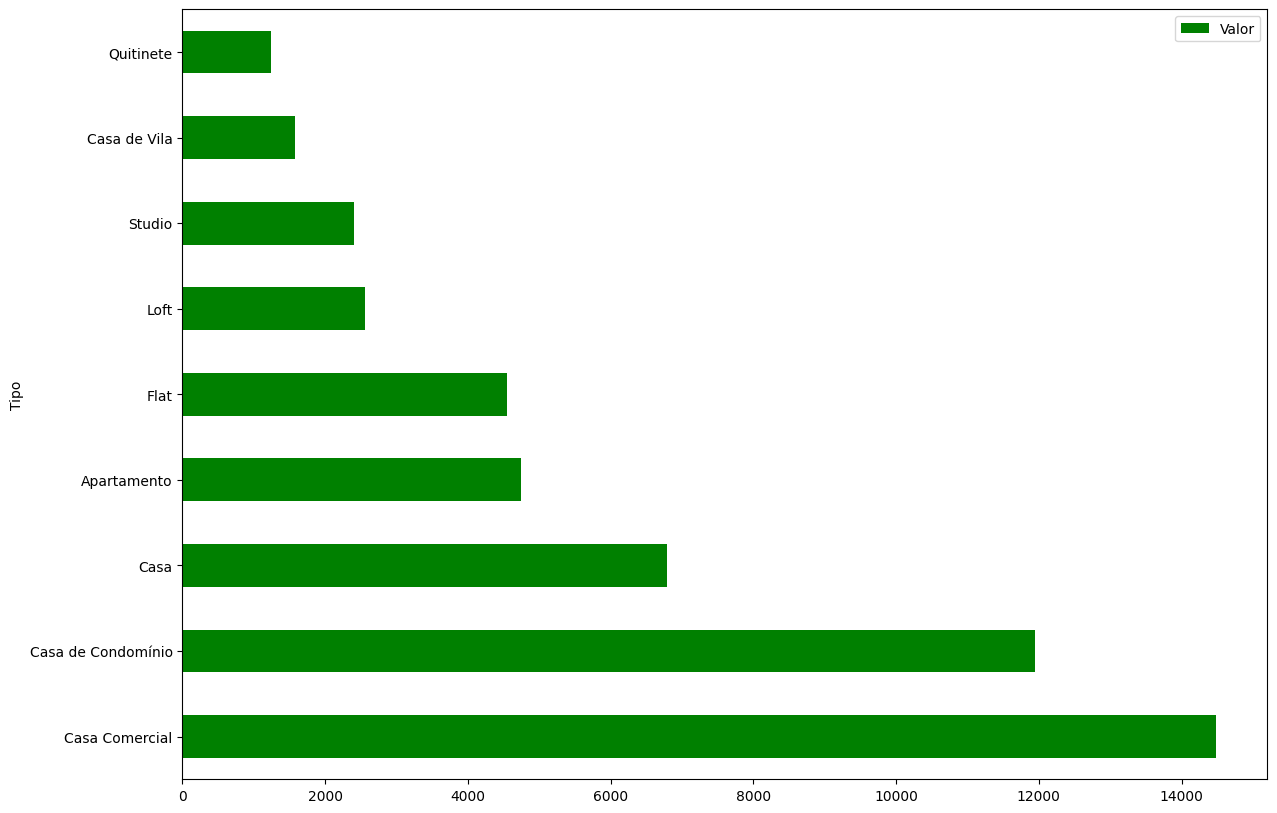

In [22]:
# #Plotando a visualização dos dados


df_bairro_comer_plt = df_bairro_comer.groupby('Tipo')[['Valor']].mean(numeric_only = True).sort_values('Valor', ascending= False)

df_bairro_comer_plt.plot(
    kind='barh',
    figsize=(14,10),
    color= 'green'
)

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [23]:
df_bairro_comer.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [24]:
df_bairro_comer.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa Comercial', 'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [25]:
#Contando a quantidade de imóveis por tipo na base de dados, o normalize = True retorna o valor em percentual do total
df_bairro_comer[['Tipo']].value_counts(normalize=True)

Tipo              
Apartamento           0.835558
Casa de Condomínio    0.042608
Casa                  0.041367
Quitinete             0.035763
Flat                  0.020363
Casa Comercial        0.011336
Casa de Vila          0.010652
Loft                  0.002182
Studio                0.000171
Name: proportion, dtype: float64

In [26]:
#O método to_frame transforma uma series em um dataframe
df_imoveis_proporcao_tipo = df_bairro_comer['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo', ascending= True)
df_imoveis_proporcao_tipo

,proportion
Tipo,
Apartamento,0.835558
Casa,0.041367
Casa Comercial,0.011336
Casa de Condomínio,0.042608
Casa de Vila,0.010652
Flat,0.020363
Loft,0.002182
Quitinete,0.035763
Studio,0.000171


<Axes: xlabel='Tipos', ylabel='Percentual'>

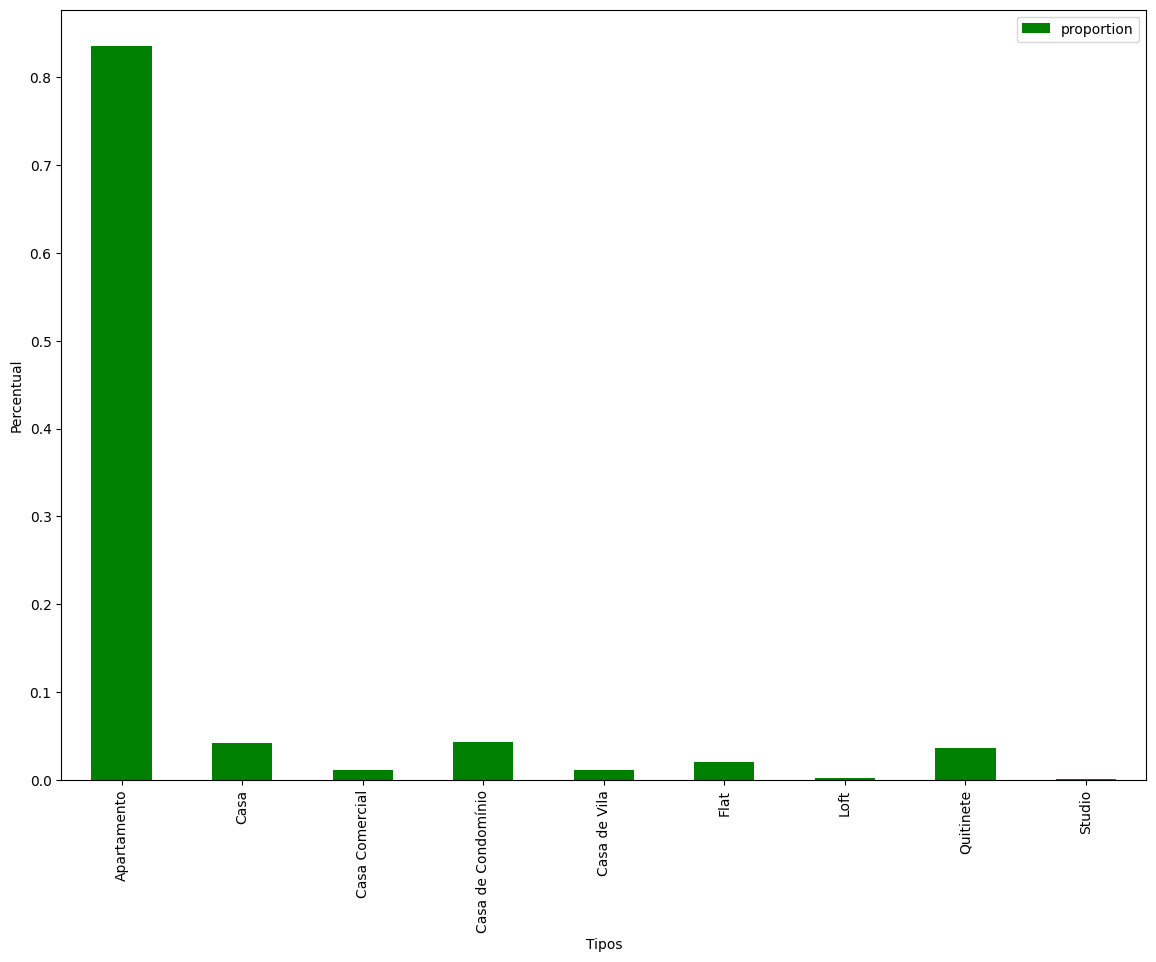

In [27]:
df_imoveis_proporcao_tipo

df_imoveis_proporcao_tipo.plot(
    kind='bar',
    figsize=(14,10),
    color= 'green',
    xlabel = 'Tipos',
    ylabel = 'Percentual'
)

### **Selecionando apenas os imóveis do tipo apartamento**

In [28]:
df_bairro_comer_ap = df_bairro_comer.query('Tipo == "Apartamento"')
df_bairro_comer_ap.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


# Tratando e filtrando os dados

## Lidando com dados nulos

In [29]:
#Quantidade de valores nulos por coluna
df_bairro.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [30]:
#Substitui os valores por 0
df_bairro = df_bairro.fillna(0)

In [31]:
df_bairro.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

## Removendo registros

In [32]:
#Removendo valores de condomínio = 0 ou valor = 0

In [33]:
df_bairro.query('Condominio == 0 | Valor == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32914,Loja/Salão,Campo Grande,0,0,0,160,2650.0,0.0,0.0
32928,Loja/Salão,Leblon,0,0,0,68,25000.0,0.0,1113.0
32929,Loja/Salão,Freguesia (Jacarepaguá),0,0,0,80,5800.0,0.0,215.0
32931,Casa,Centro,5,0,1,160,5000.0,0.0,80.0


In [34]:
#Pegando os índices das linhas que precisamos remover do dataset
reg_remov = df_bairro_comer_ap.query('Condominio == 0 | Valor == 0').index
reg_remov

Index([], dtype='int64')

In [35]:
#Removendo os registros. parametro axis = 0 (linhas), 1(colunas). O inplace é aplicado diretamente no dataset
df_bairro_comer_ap.drop(reg_remov, axis = 0, inplace=True)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_18824\3124557781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bairro_comer_ap.drop(reg_remov, axis = 0, inplace=True)


In [36]:
#Validando se os registros foram removidos
df_bairro_comer_ap.query('Condominio == 0 | Valor == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [37]:
df_bairro_comer_ap

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [ ]:
df_bairro_comer_ap.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [ ]:
#Retorna uma series onde onde tiver True tem os quartos igual a 1
df_bairro_comer['Quartos'] == 1

0         True
1        False
3         True
4         True
5        False
         ...  
32953    False
32955    False
32956    False
32957    False
32958    False
Name: Quartos, Length: 23376, dtype: bool

In [ ]:
#O dataframe tem a propriedade de receber uma series como argumento de seleção
selecao1 = df_bairro_comer['Quartos'] == 1
df_bairro_comer[selecao1]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
...,...,...,...,...,...,...,...,...,...
32922,Apartamento,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Apartamento,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Apartamento,Copacabana,1,0,0,50,1950.0,450.0,70.0
32945,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0


In [43]:
selecao2 = df_bairro_comer['Valor'] < 1200
df_bairro_comer[selecao2]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Apartamento,Olaria,3,1,0,68,1000.0,670.0,NaN
...,...,...,...,...,...,...,...,...,...
32930,Apartamento,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0


In [ ]:
#Esse tratamento realiza o filtro de ambas seleções
selecao3 = (selecao1) & (selecao2)
df_bairro_comer[selecao3]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
32763,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0
32818,Quitinete,Flamengo,1,0,0,23,900.0,605.0,NaN
32844,Quitinete,Centro,1,0,0,24,1100.0,323.0,NaN
32859,Casa,Campo Grande,1,0,0,50,600.0,NaN,NaN


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [46]:
selecao = (df_bairro_comer['Quartos'] >= 2) & (df_bairro_comer['Valor'] < 3000) & (df_bairro_comer['Area'] > 70)
df_bairro_comer[selecao]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
18,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,NaN
32,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,NaN
...,...,...,...,...,...,...,...,...,...
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN


## Salvando os dados

In [49]:
#Metodo to_csv

df_bairro_comer_ap.to_csv('dados_apartamentos.csv', index=False, sep=';')

In [51]:
pd.read_csv('dados_apartamentos.csv', sep=';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
2,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
3,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19527,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
19528,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
19529,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
19530,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Manipulando os dados

## Criando colunas numéricas

In [ ]:
#Criar as colunas de valor_mes e valor_ano

In [ ]:
#Aqui vamos trabalhar com a base completa, com todos os imóveis
df_bairro.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0


In [53]:
#Vai ser o valor do aluguel + valor do condomínio
df_bairro['Valor_por_mes'] = df_bairro['Valor'] + df_bairro['Condominio']
df_bairro.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0


In [54]:
#Coluna valor_por_ano, gastos mensais x 12 + IPTU
df_bairro['Valor_por_ano'] = (df_bairro['Valor_por_mes'] * 12) + df_bairro['IPTU']
df_bairro.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0


#### Exercicio Alura

In [55]:
import pandas as pd

dados = {
    'Nome': ['Jetta', 'Passat', 'Crossfox', 'DS5', 'Fusca'], 
    'Motor': ['Motor 4.0 Turbo', 'Motor Diesel', 'Motor Diesel V8', 'Motor 2.0', 'Motor 1.6'],
    'Ano': [2019, 2003, 1991, 2019, 1990],
    'Quilometragem': [0.0, 5712.0, 37123.0, 0.0, 120000.0],
    'Valor': [88000.0, 106000.0, 72000.0, 89000.0, 32000.0],
    'IPVA': [2000.0, 5000.0, 1700.0, 2200.0, 1000.0],
    'Desconto': [380.0, 450.0, 277.0, 400.0, 150.0]
}

df = pd.DataFrame(dados)
df

,Nome,Motor,Ano,Quilometragem,Valor,IPVA,Desconto
0,Jetta,Motor 4.0 Turbo,2019,0.0,88000.0,2000.0,380.0
1,Passat,Motor Diesel,2003,5712.0,106000.0,5000.0,450.0
2,Crossfox,Motor Diesel V8,1991,37123.0,72000.0,1700.0,277.0
3,DS5,Motor 2.0,2019,0.0,89000.0,2200.0,400.0
4,Fusca,Motor 1.6,1990,120000.0,32000.0,1000.0,150.0


In [56]:
#Precisamos criar uma coluna chamada "Valor_total" que possui o valor do carro, somado com o IPVA e subtraídos os valores de desconto. 
# Qual das alternativas abaixo apresenta o código correto para a criação dessa coluna?

df['Valor_total'] = (df['Valor'] + df['IPVA']) - df['Desconto']
df


,Nome,Motor,Ano,Quilometragem,Valor,IPVA,Desconto,Valor_total
0,Jetta,Motor 4.0 Turbo,2019,0.0,88000.0,2000.0,380.0,89620.0
1,Passat,Motor Diesel,2003,5712.0,106000.0,5000.0,450.0,110550.0
2,Crossfox,Motor Diesel V8,1991,37123.0,72000.0,1700.0,277.0,73423.0
3,DS5,Motor 2.0,2019,0.0,89000.0,2200.0,400.0,90800.0
4,Fusca,Motor 1.6,1990,120000.0,32000.0,1000.0,150.0,32850.0


## Criando colunas categóricas

In [57]:
df_bairro.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0


In [ ]:
#Criar as colunas categórias de descrição e Possui_Site.

In [61]:
df_bairro['Descricao'] = df_bairro['Tipo'] + ' em ' + df_bairro['Bairro'] + ' com ' + df_bairro['Quartos'].astype(str) + ' quarto(s) ' + df_bairro['Vagas'].astype(str) + ' vaga(s) de garagem'
df_bairro.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) 0 vaga...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) 0 vaga...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) 0 vaga(s...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis com 1 quarto(s) 0 ...


In [63]:
#Criando a coluna possue suíte
df_bairro['Possui_suite'] = df_bairro['Suites'].apply (lambda x: "Sim" if x > 0 else "Não")
df_bairro.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) 0 vaga...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) 0 vaga...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) 0 vaga(s...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis com 1 quarto(s) 0 ...,Não
